## Merging news data with monthly weather data

In [78]:
import pandas as pd  # Library for data manipulation and analysis

In [79]:
# Load the cleaned news data and the monthly weather data 
news_df = pd.read_csv('DATA/News_data.csv')
weather_monthly_df = pd.read_csv('DATA/Weather_data_monthly.csv')

In [80]:
# Displaying the "news_df" DataFrame to review its contents.
news_df

,Date,month,article count
0,2011-01-02,2011-01,1
1,2011-01-03,2011-01,2
2,2011-01-04,2011-01,2
3,2011-01-05,2011-01,2
4,2011-01-06,2011-01,2
...,...,...,...
3607,2023-08-10,2023-08,2
3608,2023-08-11,2023-08,5
3609,2023-08-12,2023-08,3
3610,2023-08-13,2023-08,2


In [81]:
# Displaying the "weather_monthly_df" DataFrame
weather_monthly_df

,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp deviation,mean daily max temp deviation,mean daily min temp deviation,mean wind speed deviation,accumulated precipitation deviation
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4


In [82]:
# Merge the news data (article_df) with the weather data (weather_df) on the 'month' column
merged_monthly_df = weather_monthly_df.merge(news_df, on='month', how='left')

# Fill any NaN values in 'article count' column with 0 and convert to integer
merged_monthly_df['article count'] = merged_monthly_df['article count'].fillna(0).astype(int)

# Group news_df by 'month' and aggregate the sum of 'article count'
news_monthly_summary = news_df.groupby('month').agg({'article count': 'sum'}).reset_index()

# Merge the weather_monthly_df with the aggregated news_monthly_summary
merged_monthly_df = weather_monthly_df.merge(news_monthly_summary, on='month', how='left')

# Fill any NaN values in 'article count' column with 0 and convert to integer
merged_monthly_df['article count'] = merged_monthly_df['article count'].fillna(0).astype(int)

# Save the merged dataframe to a CSV file
merged_monthly_df.to_csv('DATA/Final_monthly_data.csv', index=False)


merged_monthly_df


,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp deviation,mean daily max temp deviation,mean daily min temp deviation,mean wind speed deviation,accumulated precipitation deviation,article count
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5,39
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7,39
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5,30
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5,37
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2,46
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5,59
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9,68
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1,82
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4,71


## Visualization

In [83]:
# Importing required visualization libraries:
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns            # Advanced statistical plotting library

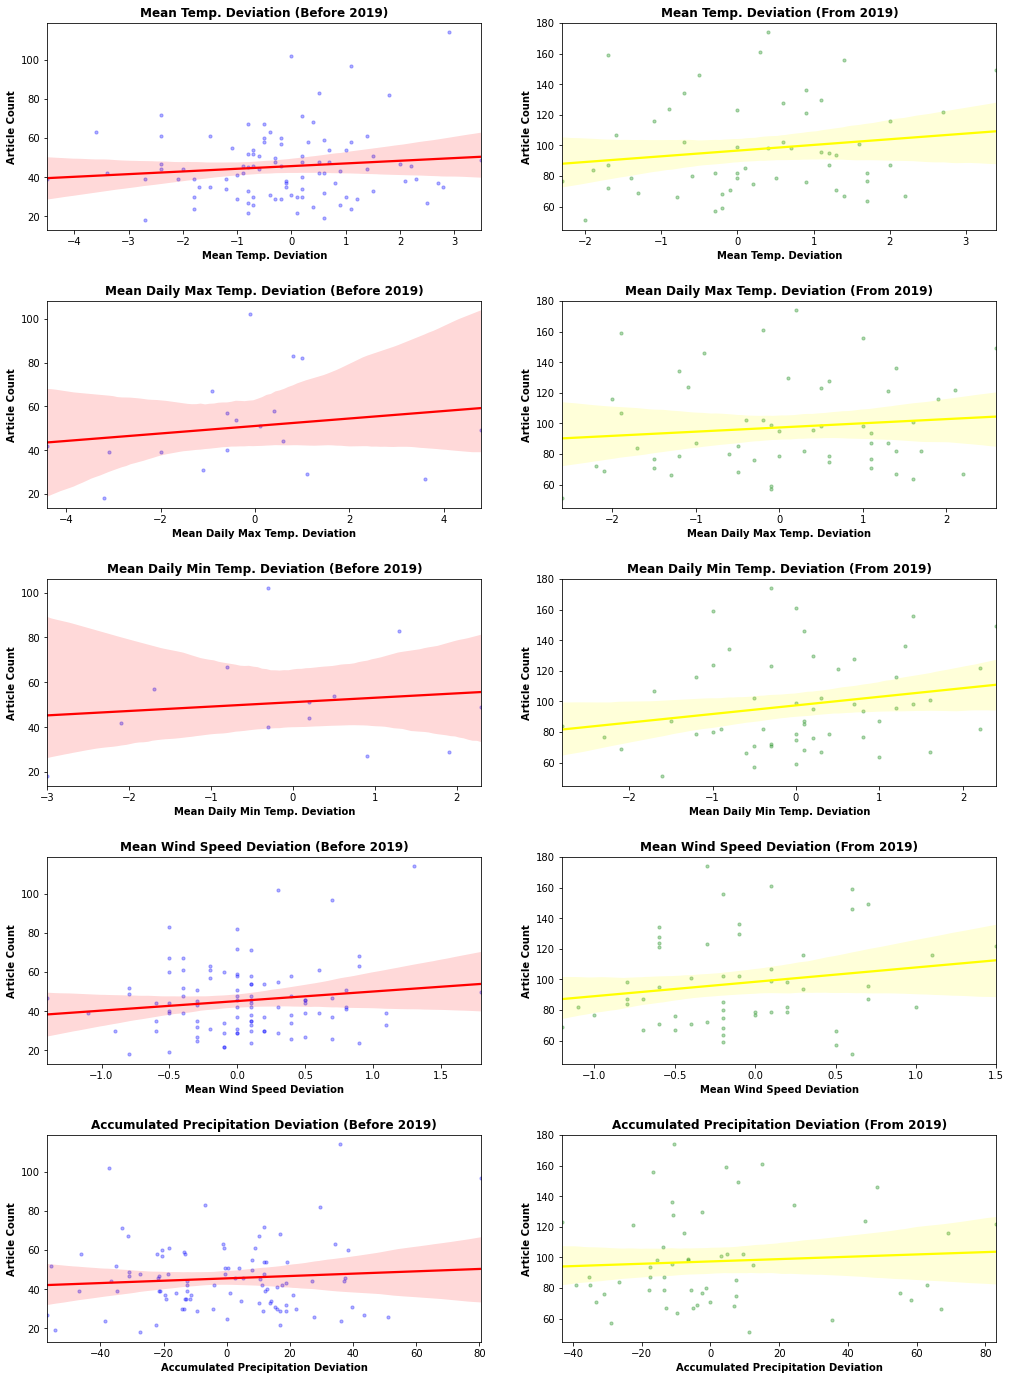

In [84]:
# Splitting data based on the 2019 structural break
before_2019 = merged_monthly_df[merged_monthly_df['month'] < '2019-01-01']
after_2019 = merged_monthly_df[merged_monthly_df['month'] >= '2019-01-01']

# Define the deviation variables and their respective labels for the plots
deviation_variables = [
    'mean temp deviation',
    'mean daily max temp deviation',
    'mean daily min temp deviation',
    'mean wind speed deviation',
    'accumulated precipitation deviation'
]
labels = [
    'Mean Temp. Deviation',
    'Mean Daily Max Temp. Deviation',
    'Mean Daily Min Temp. Deviation',
    'Mean Wind Speed Deviation',
    'Accumulated Precipitation Deviation'
]

# Set up the figure layout for comparison before and after 2019
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

# Loop through each deviation variable to plot its relationship with article count
for i, (var, label) in enumerate(zip(deviation_variables, labels)):
    
    # Scatter plot with line of best fit for data before 2019
    sns.regplot(x=before_2019[var], y=before_2019['article count'], ax=axes[i, 0], color='blue', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i, 0].set_title(f"{label} (Before 2019)", fontweight='bold')
    axes[i, 0].set_xlabel(label, fontweight='bold')
    axes[i, 0].set_ylabel('Article Count', fontweight='bold')
    
    # Scatter plot with line of best fit for data from 2019 onwards
    sns.regplot(x=after_2019[var], y=after_2019['article count'], ax=axes[i, 1], color='green', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'yellow'})
    axes[i, 1].set_title(f"{label} (From 2019)", fontweight='bold')
    axes[i, 1].set_xlabel(label, fontweight='bold')
    axes[i, 1].set_ylabel('Article Count', fontweight='bold')

# Display the plots
plt.show()


# OLS

## Monthly articles = deviation variables before/from 2019

In [85]:
import statsmodels.api as sm  # Library for estimating and testing statistical models
import numpy as np  # Library for numerical operations

In [86]:
# Work with a copy of the dataset to avoid unintentional modifications to the original
df_copy_1 = merged_monthly_df.copy()

# Extract the 'year' from the 'month' column for further processing
df_copy_1['year'] = pd.to_datetime(df_copy_1['month']).dt.year

# Introduce a "2019 structural dummy" variable to flag data from the year 2019 onwards
# This dummy will be used for interaction terms to examine structural breaks or changes from 2019
df_copy_1['2019 struc dummy'] = df_copy_1['year'].apply(lambda x: 1 if x >= 2019 else 0)

# Create interaction terms by multiplying deviation variables with the "2019 struc dummy" for post-2019 data
# And multiply deviation variables with the inverse of "2019 struc dummy" for pre-2019 data
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    df_copy_1[f"{column}_post_2019"] = df_copy_1[column] * df_copy_1['2019 struc dummy']
    df_copy_1[f"{column}_pre_2019"] = df_copy_1[column] * (1 - df_copy_1['2019 struc dummy'])  # Interaction term for pre-2019 data

# Define the independent variables (X) for the regression and the dependent variable (y)
independent_vars = [
    'mean temp deviation_pre_2019', 'mean wind speed deviation_pre_2019', 'accumulated precipitation deviation_pre_2019',
    'mean temp deviation_post_2019', 'mean wind speed deviation_post_2019', 'accumulated precipitation deviation_post_2019'
]
X = df_copy_1[independent_vars]
X = sm.add_constant(X)  # Incorporate a constant term (intercept) to the regression model
y = df_copy_1['article count']

# Conduct an OLS regression analysis and display the results
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.658
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.135
Time:                        00:15:05   Log-Likelihood:                -740.07
No. Observations:                 151   AIC:                             1494.
Df Residuals:                     144   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Monthly articles = ABSOLUTE deviation variables before/from 2019

In [87]:
# Work with a copy of the dataset to ensure the original data remains unchanged
df_copy_2 = merged_monthly_df.copy()

# Derive the 'year' column from the 'month' column for better categorization
df_copy_2['year'] = pd.to_datetime(df_copy_2['month']).dt.year

# Establish a "2019 structural dummy" variable to denote data from 2019 and later
# This will be pivotal for creating interaction terms to study potential structural changes from 2019
df_copy_2['2019 struc dummy'] = df_copy_2['year'].apply(lambda x: 1 if x >= 2019 else 0)

# Convert the original deviation variables to their absolute forms, emphasizing the magnitude of change
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    abs_col = f"absolute_{column.replace(' ', '_')}"
    df_copy_2[abs_col] = df_copy_2[column].abs()

# Construct interaction terms between the absolute values of deviation variables and the "2019 struc dummy"
for column in ['absolute_mean_temp_deviation', 'absolute_mean_wind_speed_deviation', 'absolute_accumulated_precipitation_deviation']:
    df_copy_2[f"{column}_post_2019"] = df_copy_2[column] * df_copy_2['2019 struc dummy']
    df_copy_2[f"{column}_pre_2019"] = df_copy_2[column] * (1 - df_copy_2['2019 struc dummy'])  # Interaction term for pre-2019 data

# Define the independent variables (X) to be used in the regression and the dependent variable (y)
independent_vars = [
    'absolute_mean_temp_deviation_pre_2019', 'absolute_mean_wind_speed_deviation_pre_2019', 'absolute_accumulated_precipitation_deviation_pre_2019',
    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_accumulated_precipitation_deviation_post_2019'
]
X = df_copy_2[independent_vars]
X = sm.add_constant(X)  # Include a constant term (intercept) in the regression model
y = df_copy_2['article count']

# Conduct an OLS regression analysis and display its summary
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     16.27
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.03e-14
Time:                        00:15:05   Log-Likelihood:                -706.04
No. Observations:                 151   AIC:                             1426.
Df Residuals:                     144   BIC:                             1447.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

## Log of monthly articles = SQUARED deviation variables before/from 2019

In [88]:
# Create a copy of the dataset to ensure original data remains unmodified during our operations
df_copy_3 = merged_monthly_df.copy()

# Extract the 'year' from the 'month' column for categorization and structural break analysis
df_copy_3['year'] = pd.to_datetime(df_copy_3['month']).dt.year

# Generate a "2019 structural dummy" variable to differentiate data from 2019 onwards
# This will be critical for generating interaction terms to explore potential structural shifts post-2019
df_copy_3['2019 struc dummy'] = df_copy_3['year'].apply(lambda x: 1 if x >= 2019 else 0)

# Square the deviation variables to explore non-linear relationships in our data
# This allows for capturing potential quadratic relationships between deviations and article counts
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    squared_col = f"squared_{column.replace(' ', '_')}"
    df_copy_3[squared_col] = df_copy_3[column] ** 2

# Construct interaction terms between squared deviation variables and the "2019 struc dummy"
# Also rename the squared deviation variables for pre-2019 data
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_accumulated_precipitation_deviation']:
    df_copy_3[f"{column}_post_2019"] = df_copy_3[column] * df_copy_3['2019 struc dummy']
    df_copy_3[f"{column}_pre_2019"] = df_copy_3[column] * (1 - df_copy_3['2019 struc dummy'])  # Assign the pre-2019 values

# Define the squared independent variables (X) for the regression and the dependent variable (y)
independent_vars = [
    'squared_mean_temp_deviation_pre_2019', 'squared_mean_wind_speed_deviation_pre_2019', 'squared_accumulated_precipitation_deviation_pre_2019',
    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_accumulated_precipitation_deviation_post_2019'
]
X = df_copy_3[independent_vars]
X = sm.add_constant(X)  # Include a constant term (intercept) for the regression
y = df_copy_3['article count']

# Implement the OLS regression analysis and display its results
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     8.259
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.08e-07
Time:                        00:15:05   Log-Likelihood:                -722.78
No. Observations:                 151   AIC:                             1460.
Df Residuals:                     144   BIC:                             1481.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## Log of monthly articles = deviation variables before/from 2019

In [89]:
# Create a copy of the dataset to ensure original data remains unmodified during our operations
df_copy_4 = merged_monthly_df.copy()

# Extract the 'year' from the 'month' column for categorization and structural break analysis
df_copy_4['year'] = pd.to_datetime(df_copy_4['month']).dt.year

# Generate a "2019 structural dummy" variable to differentiate data from 2019 onwards
# This will be critical for generating interaction terms to explore potential structural shifts post-2019
df_copy_4['2019 struc dummy'] = df_copy_4['year'].apply(lambda x: 1 if x >= 2019 else 0)

# To address skewness or ensure a more linear relationship, transform the 'article count' column
# Using the natural logarithm of 'article count + 1' ensures no issues arise when taking logs of zero values
df_copy_4['log_article_count'] = np.log(df_copy_4['article count'] + 1)

# Construct interaction terms between deviation variables and the "2019 struc dummy"
# Also rename the original deviation variables for pre-2019 data
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    df_copy_4[f"{column}_post_2019"] = df_copy_4[column] * df_copy_4['2019 struc dummy']
    df_copy_4[f"{column}_pre_2019"] = df_copy_4[column] * (1 - df_copy_4['2019 struc dummy'])  # Assign the pre-2019 values

# Define the independent variables (X) for the regression and the transformed dependent variable (y)
independent_vars = [
    'mean temp deviation_pre_2019', 'mean wind speed deviation_pre_2019', 'accumulated precipitation deviation_pre_2019',
    'mean temp deviation_post_2019', 'mean wind speed deviation_post_2019', 'accumulated precipitation deviation_post_2019'
]
X = df_copy_4[independent_vars]
X = sm.add_constant(X)  # Include a constant term (intercept) for the regression
y = df_copy_4['log_article_count']  # Using the logarithmically transformed dependent variable

# Implement the OLS regression analysis and display its results
model_4 = sm.OLS(y, X).fit()
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:      log_article_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.555
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.165
Time:                        00:15:05   Log-Likelihood:                -103.57
No. Observations:                 151   AIC:                             221.1
Df Residuals:                     144   BIC:                             242.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Log of monthly articles = ABSOLUTE deviation variables before/from 2019

In [90]:
# Create a copy of the dataset to ensure the original data is unaffected
df_copy_5_monthly = merged_monthly_df.copy()

# Extract the 'year' for creating a "2019 structural dummy" variable
df_copy_5_monthly['year'] = pd.to_datetime(df_copy_5_monthly['month']).dt.year
# Generate a structural dummy to differentiate data before and after 2019
df_copy_5_monthly['2019 struc dummy'] = df_copy_5_monthly['year'].apply(lambda x: 1 if x >= 2019 else 0)

# To address skewness, transform the 'article count' using the natural logarithm
df_copy_5_monthly['log_article_count'] = np.log(df_copy_5_monthly['article count'] + 1)

# Construct interaction terms with the absolute deviation variables and the "2019 struc dummy"
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    df_copy_5_monthly[f"absolute_{column.replace(' ', '_')}_post_2019"] = df_copy_5_monthly[column].abs() * df_copy_5_monthly['2019 struc dummy']
    df_copy_5_monthly[f"absolute_{column.replace(' ', '_')}_pre_2019"] = df_copy_5_monthly[column].abs() * (1 - df_copy_5_monthly['2019 struc dummy'])

# Convert original deviation variables to absolute values
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    df_copy_5_monthly[f"absolute_{column.replace(' ', '_')}"] = df_copy_5_monthly[column].abs()

# Define the set of independent variables and the transformed dependent variable for regression
independent_vars = [
    'absolute_mean_temp_deviation_pre_2019', 'absolute_mean_wind_speed_deviation_pre_2019', 'absolute_accumulated_precipitation_deviation_pre_2019',
    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_accumulated_precipitation_deviation_post_2019'
]
X = df_copy_5_monthly[independent_vars]
X = sm.add_constant(X)  # Add a constant column for the intercept
y = df_copy_5_monthly['log_article_count']  # Use the logarithmically transformed dependent variable

# Conduct the OLS regression analysis and display the results
model_5_monthly = sm.OLS(y, X).fit()
print(model_5_monthly.summary())


                            OLS Regression Results                            
Dep. Variable:      log_article_count   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     17.18
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.40e-15
Time:                        00:15:05   Log-Likelihood:                -67.543
No. Observations:                 151   AIC:                             149.1
Df Residuals:                     144   BIC:                             170.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

## Log of monthly articles = SQUARED deviation variables before/from 2019

In [91]:
# Create a copy of the dataset to ensure the original data is unaffected
df_copy_6_monthly = merged_monthly_df.copy()

# Extract the 'year' to create a "2019 structural dummy" variable
df_copy_6_monthly['year'] = pd.to_datetime(df_copy_6_monthly['month']).dt.year
df_copy_6_monthly['2019 struc dummy'] = df_copy_6_monthly['year'].apply(lambda x: 1 if x >= 2019 else 0)

# Address skewness in the 'article count' by using the natural logarithm transformation
df_copy_6_monthly['log_article_count'] = np.log(df_copy_6_monthly['article count'] + 1)

# Square each of the deviation variables for a quadratic representation
for column in ['mean temp deviation', 'mean wind speed deviation', 'accumulated precipitation deviation']:
    df_copy_6_monthly[f"squared_{column.replace(' ', '_')}"] = df_copy_6_monthly[column] ** 2

# Construct interaction terms with the squared deviation variables and the "2019 struc dummy"
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_accumulated_precipitation_deviation']:
    df_copy_6_monthly[f"{column}_post_2019"] = df_copy_6_monthly[column] * df_copy_6_monthly['2019 struc dummy']
    df_copy_6_monthly[f"{column}_pre_2019"] = df_copy_6_monthly[column] * (1 - df_copy_6_monthly['2019 struc dummy'])

# Define the set of squared independent variables and the transformed dependent variable for regression
independent_vars = [
    'squared_mean_temp_deviation_pre_2019', 'squared_mean_wind_speed_deviation_pre_2019', 'squared_accumulated_precipitation_deviation_pre_2019',
    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_accumulated_precipitation_deviation_post_2019'
]
X = df_copy_6_monthly[independent_vars]
X = sm.add_constant(X)  # Incorporate a constant column for the intercept
y = df_copy_6_monthly['log_article_count']  # Use the logarithmically transformed dependent variable

# Conduct the OLS regression and present the results
model_6_monthly = sm.OLS(y, X).fit()
print(model_6_monthly.summary())


                            OLS Regression Results                            
Dep. Variable:      log_article_count   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     8.347
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           9.04e-08
Time:                        00:15:05   Log-Likelihood:                -85.771
No. Observations:                 151   AIC:                             185.5
Df Residuals:                     144   BIC:                             206.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------